In [179]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns 
from statsmodels.formula.api import ols

In [180]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [181]:
# Scrub - Converting data types 

In [182]:
#convert column name ['date'] from object to datetime 

#might be cool to create a function that takes any column date and converts it 

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [183]:
# Obvious issue with sqft_basement due to columns
#First attempt to convert failed due to ? marks so we need to remove them 

df['sqft_basement'].nunique() 

304

In [184]:
#replacing all ? with 0's - major assumption that requires data enrichment to correct
#

df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x==
                                             '?' else x)

df['sqft_basement'] = df['sqft_basement'].astype(float)

In [185]:
# Scrub - Treating Null values 

In [186]:
# Identify null values 

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [187]:
# Look for columns where all 3 are missing 
#This isnt a huge % of the data so we allow it 

print('Number Missing All Three:',
     len(df[(df.waterfront.isnull())
           & (df.view.isnull())
           & (df.yr_renovated.isnull())]))

Number Missing All Three: 2


In [188]:
#Repeat the same process for view which indicates how many times a house has been viewed

#We replaced all views with a median value, its safe to assume houses on the market in these areas are quite popular and viewed 
median = df['view'].median()
df['view'] = df['view'].fillna(value=median)#Waterfront 0 = No waterfront, 1=Waterfront 

#Making all nulls 0 indicating no waterfront 

df['waterfront'].isna().sum()

df['waterfront'] = df['waterfront'].fillna(0)

In [189]:
df['view'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: float64

In [190]:
df['yr_renovated'].isna().sum()

3842

In [215]:
# Assuming renovation nulls are the same as renovation yr_built 

df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [216]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Major assumptions of scrubbing 

1. Waterfront - nulls = 0 and 1 means on the waterfront, replaced all nulls with 0 

2. Filled view with median value, assuming all houses are viewed or in demand (justification is this is a major area with lots of people moving there) 

3. if there is no yr_renovated, fill with most recent year built 

In [217]:
# Scrubbing - Outliers 

In [218]:
df.duplicated(subset='id')

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21420, dtype: bool

In [219]:
dupe_count = (len(df['id'])) - (len(df['id'].unique()))

In [220]:
dupe_count

0

In [221]:
#dropped all duplicates for id 
#inplace = True changes the dataframe permanently

df.drop_duplicates(subset=['id'], inplace=True)

In [222]:
21597 - 21420 #we lost 177 columns

177

In [223]:
21597 - 21420 #we lost 177 columns

177

# Defining categorical variables

In [224]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,285.904342,1971.092997,1971.092997,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,440.008202,29.387141,29.387141,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,1952.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1975.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,1997.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


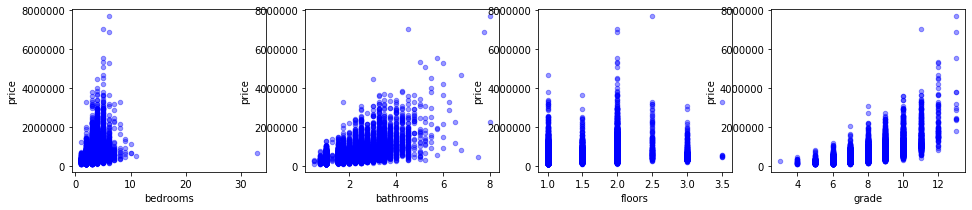

In [225]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

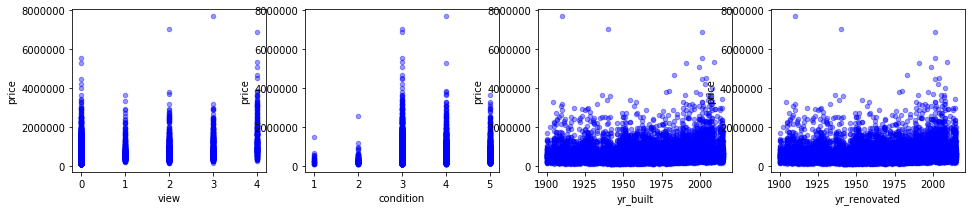

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['view', 'condition', 'yr_built', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

# Transforming categorical variables 

# Potentially encode 'floors', 'grade', 'view', 'condition', 'yr_renovated'

# Multicollinearity 

In [228]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [233]:
import plotly.express as px
import plotly.graph_objects as go


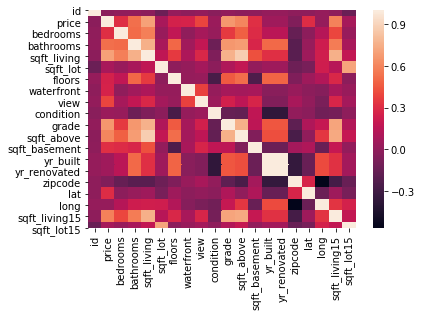

In [236]:
corr = df.corr()

sns.heatmap(corr)

# sqft_living is multicolinear with the most columns (5) then grade (3)

# yr_built, yr_renovated are mc so one needs to go 

# sqft_above needs to be dropped 

# Tranforming Categorical Variables 

In [176]:
df[['floors', 'grade', 'view', 'condition']].nunique()

floors        6
grade        11
view          5
condition     5
dtype: int64

# Label Encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

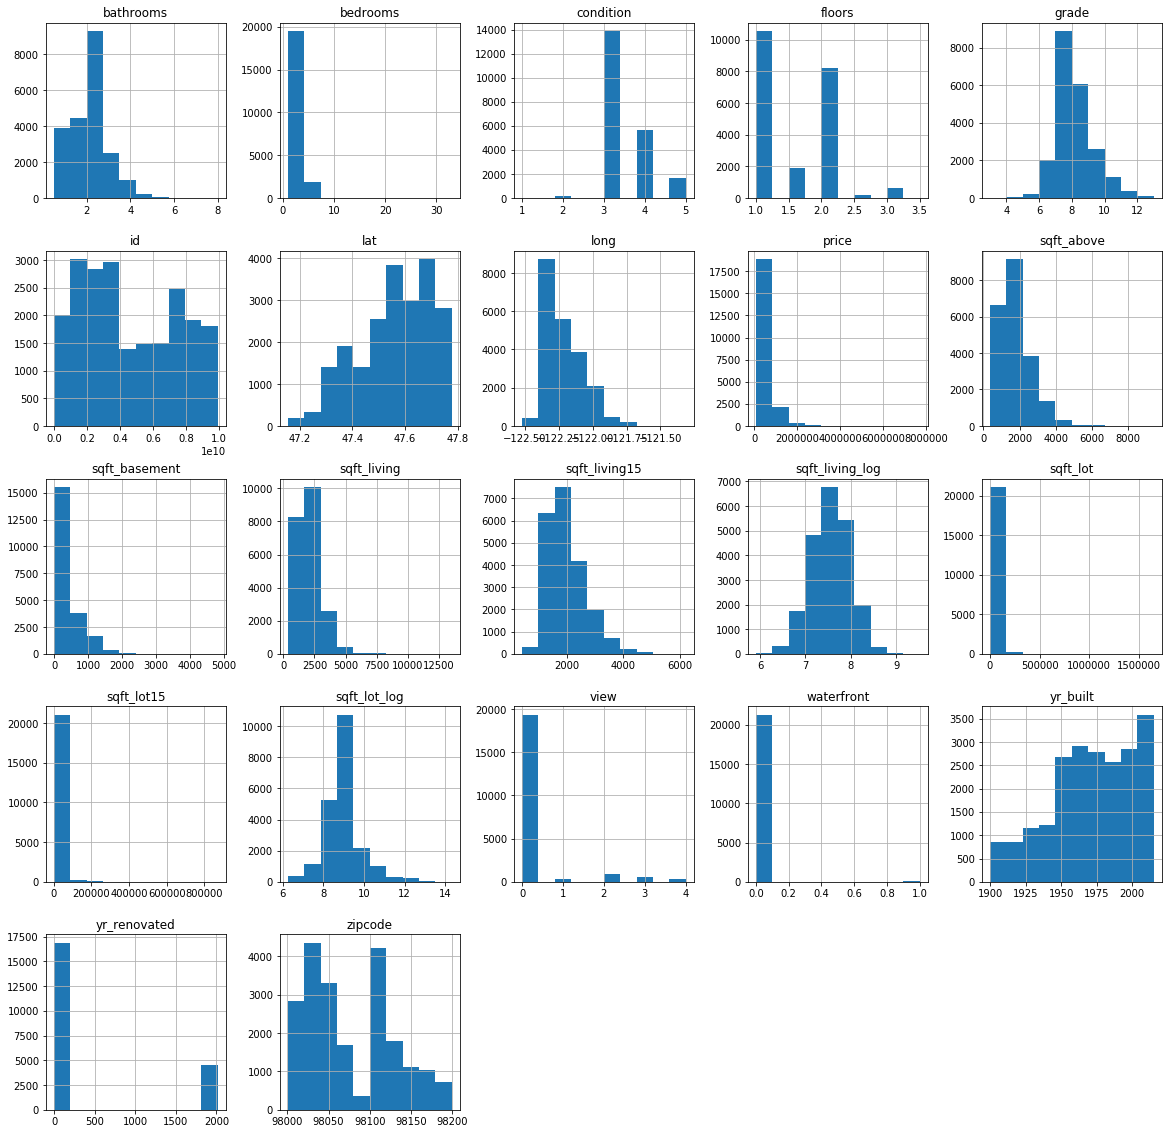

In [177]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

# Check the assumptions

# Linear Relationship

Graph all the explanatory variables against the outcome 



# Checking sqft variables

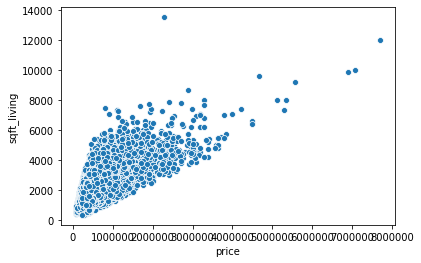

In [125]:
sns.scatterplot(x='price', y='sqft_living', data=df)

Observation: There is correlation but outliers are worth noting. Heteroscedacity possible.

(array([8.2610e+03, 1.0092e+04, 2.5720e+03, 3.9300e+02, 7.2000e+01,
        2.3000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  370.,  1687.,  3004.,  4321.,  5638.,  6955.,  8272.,  9589.,
        10906., 12223., 13540.]),
 <a list of 10 Patch objects>)

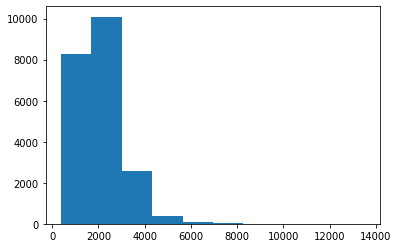

In [157]:
# Histogram of variable 

plt.hist(df['sqft_living'])

# With log function

In [242]:
df['sqft_living_log'] = np.log(df['sqft_living'])

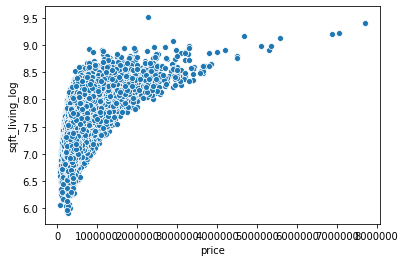

In [147]:
sns.scatterplot(x='price', y='sqft_living_log', data=df)

(array([2.400e+01, 3.050e+02, 1.760e+03, 4.826e+03, 6.777e+03, 5.416e+03,
        1.981e+03, 2.920e+02, 3.400e+01, 5.000e+00]),
 array([5.91350301, 6.27349306, 6.63348311, 6.99347317, 7.35346322,
        7.71345328, 8.07344333, 8.43343338, 8.79342344, 9.15341349,
        9.51340355]),
 <a list of 10 Patch objects>)

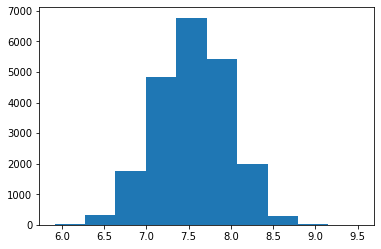

In [159]:
plt.hist(df['sqft_living_log'])

In [ ]:
Created a normal distribution of this variable

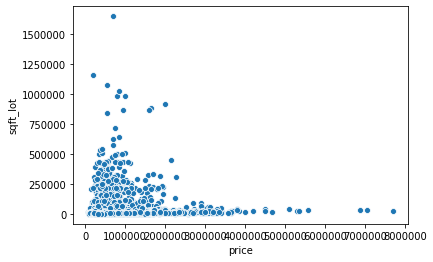

In [148]:
sns.scatterplot(x='price', y='sqft_lot', data=df)

# Log function

In [245]:
df['sqft_lot_log'] = np.log(df['sqft_lot'])

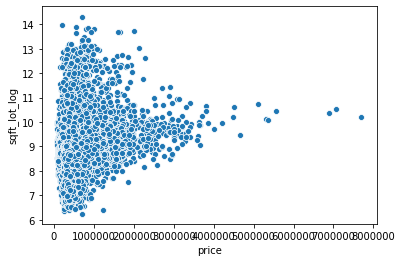

In [156]:
sns.scatterplot(x='price', y='sqft_lot_log', data=df)

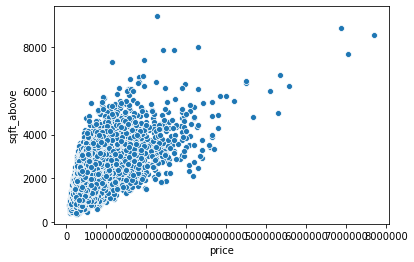

In [129]:
sns.scatterplot(x='price', y='sqft_above', data=df)

Observation: Heteroscedacity is appearing 

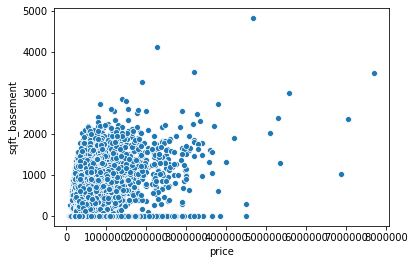

In [130]:
sns.scatterplot(x='price', y='sqft_basement', data=df)

Observation: Heteroscedacity is appearing again!

# Log Function

In [238]:
df['sqft_basement_log'] = np.log(df['sqft_basement'])

sns.scatterplot(x='price', y='sqft_living15', data=df)

In [ ]:
# Log function

In [239]:
df['sqft_living15_log'] = np.log(df['sqft_living15'])

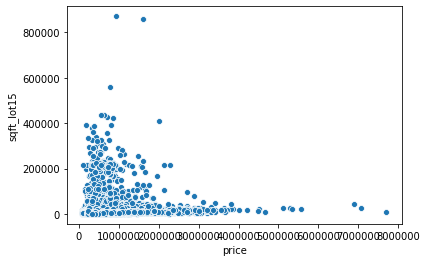

In [132]:
sns.scatterplot(x='price', y='sqft_lot15', data=df)

Observation: Lots of heteroscedacity 

# sqft columns all have heteroscedacity
# Log function is being applied to all sqft columns

In [ ]:
# Since multicolinearity is displayed, certain columns will need to be removed

#Before I make that decision, 

# Linear Relationship with the rest of the variables 

In [ ]:
'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'grade'

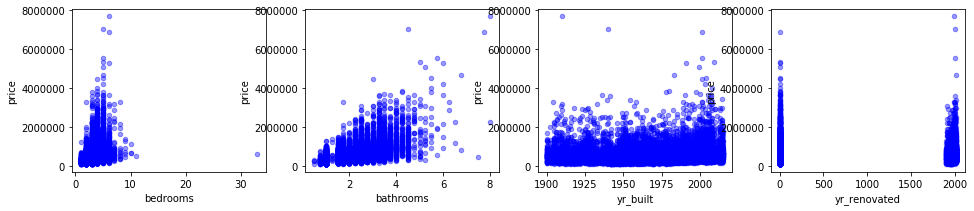

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

# Feature Scaling and Normalization

In [255]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement_log',
       'sqft_living15_log', 'sqft_living_log', 'sqft_lot_log'],
      dtype='object')

In [ ]:
linear_relationship_variables = ['sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E1E677470>,
      dtype=object)

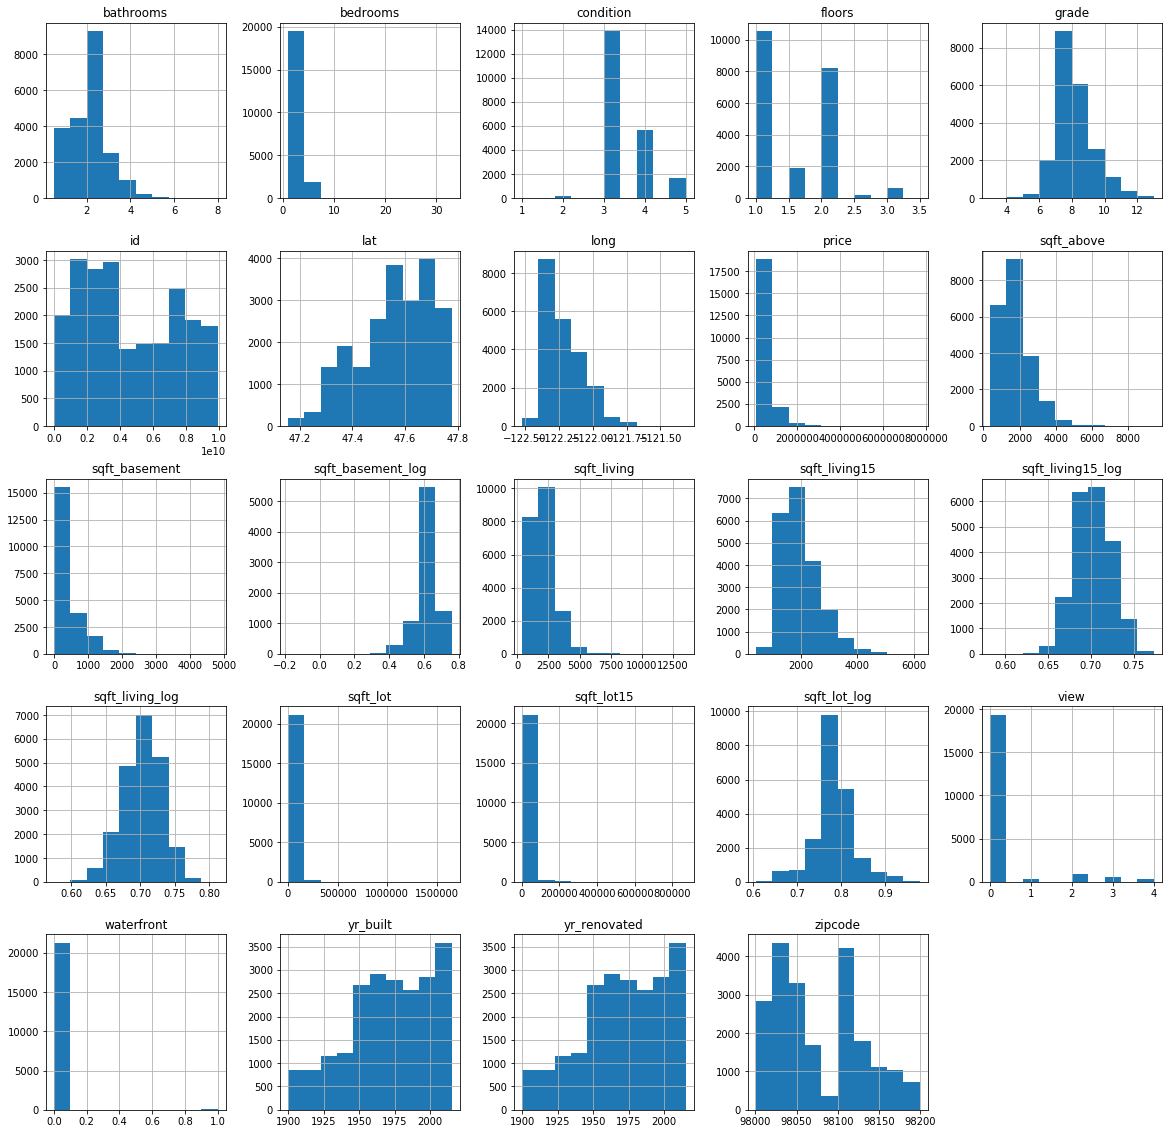

In [258]:
df.hist(figsize=(20,20))

In [72]:
# Drop ID and date 
features= list(df.columns.drop(['id', 'date', 'lat', 'long']))

In [73]:
#find things 3 stdev above the need 

from scipy import stats
df[(np.abs(stats.zscore(df[features])) < 3).all(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [74]:
new_df = df[(np.abs(stats.zscore(df[features])) < 3).all(axis=1)]